<a href="https://colab.research.google.com/github/doggest25/machine_learning/blob/main/week%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # import DT
from sklearn.ensemble import RandomForestClassifier # import RandomForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Persiapan Data

In [ ]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/ML/wbc.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Cek kolom null
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
# Seleksi fitur

# Slice dataframe mulai dari kolom 'radius_mean' sampai 'fractal_dimension_worst'
X = df.iloc[:,3:-1]
y = df['diagnosis']
y = y.map({'M':1, 'B':0}) # Encode label

# Cek jumlah fitur dan instance
X.shape

(569, 29)

Split data training dan testing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Traning Decision Tree

In [ ]:
# Secara default, DecisionTreeClassifier dari scikit-learn akan menggunakan nilai "Gini" untuk kriteria
# Terdapat beberapa "hyperparamater" yang dapat digunakan. Silahka baca dokumentasi
# Pada kasus ini kita akan menggunakan parameter default
dt = DecisionTreeClassifier()

# Sesuaikan dt ke set training
dt.fit(X_train, y_train)

# Memprediksi label set test
y_pred_dt = dt.predict(X_test)

#  menghitung set accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Test set accuracy: 0.95
Test set accuracy: 0.9473684210526315


Training RandomForest

In [ ]:
# Pada kasus kali ini kita akan menggunakan estimator pada RandomForest
# Untuk detail parameter (hyperparameter) silahkan cek dokumentasi

rf = RandomForestClassifier(n_estimators=10, random_state=1)

# Sesuaikan dt ke set training
rf.fit(X_train, y_train)

# Memprediksi label set test
y_pred_rf = rf.predict(X_test)

#  menghitung set accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Test set accuracy: {:.2f}".format(acc_rf))
print(f"Test set accuracy: {acc_rf}")

Test set accuracy: 0.96
Test set accuracy: 0.956140350877193


# Praktikum 2

Boosting dengan AdaBoost
Pada kasus ini kita akan menggunakan salah satu metode boosting yaitu AdaBoost untuk mengklasifikasikan jenis bunga Iris. Dalam latihan ini kita akan menggunakan dataset Iris yang sangat lazim digunakan. Latihan ini akan melakukan prediksi memprediksi 3 jenis bunga Iris yaitu, Iris Setosa, Iris Versicolor, dan Iris Virginica berdasarkan panjang dan lebar sepal dan petal.

Kita akan membandingkan performa dari algoritma Decision Tree dan AdaBoost pada kasus ini.

Import Library

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # import DT
from sklearn.ensemble import AdaBoostClassifier # import AdaBoost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder # Kebutuhan encoding label

Persiapan Data

In [ ]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/ML/iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Cek kolom null
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
# Seleksi fitur
X = df.iloc[:,2:-1]
y = df['Species']

# encode label
ec = LabelEncoder()
y = ec.fit_transform(y)

# Cek jumlah fitur dan instance
print(X.shape)

# Cek label
print(y)

(150, 3)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Split data training dan testing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Training Decision Tree

In [ ]:
# Secara default, DecisionTreeClassifier dari scikit-learn akan menggunakan nilai "Gini" untuk kriteria
# Terdapat beberapa "hyperparamater" yang dapat digunakan. Silahka baca dokumentasi
# Pada kasus ini kita akan menggunakan parameter default
dt = DecisionTreeClassifier()

# Sesuaikan dt ke set training
dt.fit(X_train, y_train)

# Memprediksi label set test
y_pred_dt = dt.predict(X_test)

#  menghitung set accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Test set accuracy: 0.97
Test set accuracy: 0.9666666666666667


Training AdaBoost

In [ ]:
# Pada kasus kali ini kita akan menggunakan estimator pada AdaBoost
# Untuk detail parameter (hyperparameter) silahkan cek dokumentasi

ada = AdaBoostClassifier(n_estimators=2)

# Sesuaikan dt ke set training
ada.fit(X_train, y_train)

# Memprediksi label set test
y_pred_ada = ada.predict(X_test)

#  menghitung set accuracy
acc_ada = accuracy_score(y_test, y_pred_ada)
print("Test set accuracy: {:.2f}".format(acc_ada))
print(f"Test set accuracy: {acc_ada}")

Test set accuracy: 0.97
Test set accuracy: 0.9666666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


# Praktikum 3

Stacking
Lengkapi bagian berikut dengan data sesuai tugas, dan tentukan perbedaan nilai akurasi antara Random Forest, Adaboost, dan Stacking

In [ ]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier



layer_one_estimators = [
                        ('rf_1', RandomForestClassifier(n_estimators=10, random_state=42)),
                        ('knn_1', KNeighborsClassifier(n_neighbors=5))
                       ]
layer_two_estimators = [
                        ('dt_2', DecisionTreeClassifier()),
                        ('rf_2', RandomForestClassifier(n_estimators=50, random_state=42)),
                       ]
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=LogisticRegression())


clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
clf.fit(X_train, y_train).score(X_test, y_test)

0.868421052631579

# Praktikum 4

Stacking dengan Voting
Pada kasus ini kita akan menggunakan salah satu metode stacking yaitu voting untuk mengklasifikasikan pasien penderita diabetes dengan beberapa ciri. Pasien akan di klasifikasikan menjadi pasien menderita diabetes (1) dan tidak menderita diabetes (0). Pertama-tama, kita akan menggunakan beberapa algoritma klasifikasi secara terpisah, yaitu Naive Bayes, SVM Linier, dan SVM RBF. Setelah itu, kita akan menggabungkan performa dari 3 algoritma tersebut dengan menggunakan metode ensemble voting.

Import Library

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB # import Naive Bayes model Gaussian (asumsi data terdistribusi normal)
from sklearn.svm import SVC # import SVM classifier
from sklearn.ensemble import VotingClassifier # import model Voting
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

Persiapan Data

In [ ]:
# Load Data

dbt = pd.read_csv('/content/drive/MyDrive/ML/diabetes.csv')

dbt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Cek nama kolom
dbt.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# Cek kolom null
dbt.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# Pada kasus ini, agak tidak masuk akal jika beberapa parameter bernilai 0
# sebagai contoh adalah nilai 'Glucose', 'BloodPlessure' ataupun 'Insulin'.
# Sekecil apapun nilainya, setiap manusia yang hidup pasti miliki nilai-nilai tersebut

# Kita akan manipulasi nilai yang 0 dengan melakukan 'imputasi' atau mengganti nilainya dengan nilai sintetis
# Pada kasus ini, kita akan menggunakan nilai mean

# Cek kolom neng nilai 0
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(dbt.loc[dbt[column] == 0])}")

Pregnancies ==> Missing zeros : 111
Glucose ==> Missing zeros : 5
BloodPressure ==> Missing zeros : 35
SkinThickness ==> Missing zeros : 227
Insulin ==> Missing zeros : 374
BMI ==> Missing zeros : 11
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


In [ ]:
# Impute nilai 0 dengan mean
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)

dbt[feature_columns] = fill_values.fit_transform(dbt[feature_columns])

Split data training dan testing

In [ ]:
X = dbt[feature_columns]
y = dbt.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Training dengan GaussianNB

Standarisasi Fitur

In [ ]:
# Karena asumsi Gaussian NB adalah data terdistribusi secara normal,
# maka kita perlu melakukan standarisasi

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Standarisasi pada fitur di X_train dan X_test
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Training dan Evaluasi

In [ ]:
# Buat obyek GaussianNB
gnb_std = GaussianNB()

# Fit dengan data yang telah di standarisasi
gnb_std.fit(X_train_std, y_train)

# Prediksi dengan data test
y_pred_gnb = gnb_std.predict(X_test_std)

# Evaluasi akurasi testing data
acc_gnb = accuracy_score(y_test, y_pred_gnb)

# Print hasil evaluasi
print("Test set accuracy: {:.2f}".format(acc_gnb))
print(f"Test set accuracy: {acc_gnb}")

Test set accuracy: 0.74
Test set accuracy: 0.7359307359307359


Training dengan SVM Linier

In [ ]:
# Model SVM linier tanpa tunnning hyperparameter
svm_lin = SVC(kernel='linear')

# Fit ke model
svm_lin.fit(X_train_std, y_train)

# Prediksi
y_pred_svm_lin = svm_lin.predict(X_test_std)

# Evaluasi akurasi testing data
acc_svm_lin = accuracy_score(y_test, y_pred_svm_lin)

# Print hasil evaluasi
print("Test set accuracy: {:.2f}".format(acc_svm_lin))
print(f"Test set accuracy: {acc_svm_lin}")

Test set accuracy: 0.74
Test set accuracy: 0.7402597402597403


Training dengan SVM RBF

In [ ]:
# Model SVM RBF tanpa tunnning hyperparameter
svm_rbf = SVC(kernel='rbf')

# Fit ke model
svm_rbf.fit(X_train_std, y_train)

# Prediksi
y_pred_svm_rbf = svm_rbf.predict(X_test_std)

# Evaluasi akurasi testing data
acc_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)

# Print hasil evaluasi
print("Test set accuracy: {:.2f}".format(acc_svm_rbf))
print(f"Test set accuracy: {acc_svm_rbf}")

Test set accuracy: 0.72
Test set accuracy: 0.7229437229437229


Training dengan Voting

In [ ]:
# Definisikan algoritma yang akan digunakan untuk voting

clf1 = GaussianNB()
clf2 = SVC(kernel='linear')
clf3 = SVC(kernel='rbf', probability=True)

# model hard voting
voting = VotingClassifier(estimators=[('GaussianNB', clf1), ('SVM-LIN', clf2), ('SVM-RBF', clf3)], voting='hard')

# Fit model
voting.fit(X_train_std, y_train)

# Prediksi
y_pred_vt1 = voting.predict(X_test_std)

# Evaluasi akurasi testing data
acc_vt1 = accuracy_score(y_test, y_pred_vt1)

# Print hasil evaluasi
print('Voting Hard')
print("Test set accuracy: {:.2f}".format(acc_vt1))
print(f"Test set accuracy: {acc_vt1}")

Voting Hard
Test set accuracy: 0.74
Test set accuracy: 0.7402597402597403


# TUGAS 1


Terdapat dataset mushroom. Berdasarkan dataset yang tersebut, bandingkan peforma antara algoritma Decision Tree dan RandomForest. Gunakan tunning hyperparameter untuk mendapatkan parameter dan akurasi yang terbaik.

In [ ]:
import pandas as pd
import numpy as np

# Untuk preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

# Algoritma yang akan digunakan
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Untuk evaluasi
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load Data
dbt = pd.read_csv('/content/drive/MyDrive/ML/mushrooms.csv')

# Tampilkan 5 baris pertama
print(dbt.head())

# Informasi dataset
print(dbt.info())

# Cek apakah ada nilai yang hilang
print(dbt.isnull().sum())


  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [ ]:
le = LabelEncoder()

for column in dbt.columns:
    dbt[column] = le.fit_transform(dbt[column])

print(dbt.head())


   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0         

In [ ]:
X = dbt.drop('class', axis=1)
y = dbt['class']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42)

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [ ]:
dt_grid = GridSearchCV(estimator=dt_clf,
                       param_grid=dt_param_grid,
                       cv=5,
                       n_jobs=-1,
                       scoring='accuracy',
                       verbose=2)

dt_grid.fit(X_train, y_train)

print("Best Parameters for Decision Tree:", dt_grid.best_params_)
print("Best CV Accuracy for Decision Tree:", dt_grid.best_score_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Accuracy for Decision Tree: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

In [ ]:
dt_best = dt_grid.best_estimator_
y_pred_dt = dt_best.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Test Accuracy for Decision Tree:", dt_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Test Accuracy for Decision Tree: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
 [[843   0]
 [  0 782]]


In [ ]:
rf_clf = RandomForestClassifier(random_state=42)

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [ ]:
rf_grid = GridSearchCV(estimator=rf_clf,
                       param_grid=rf_param_grid,
                       cv=5,
                       n_jobs=-1,
                       scoring='accuracy',
                       verbose=2)

rf_grid.fit(X_train, y_train)

print("Best Parameters for Random Forest:", rf_grid.best_params_)
print("Best CV Accuracy for Random Forest:", rf_grid.best_score_)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Accuracy for Random Forest: 1.0


In [ ]:
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Test Accuracy for Random Forest:", rf_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Test Accuracy for Random Forest: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
 [[843   0]
 [  0 782]]


In [ ]:
# Buat DataFrame untuk membandingkan akurasi
performance = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Training Accuracy': [dt_grid.best_score_, rf_grid.best_score_],
    'Test Accuracy': [dt_accuracy, rf_accuracy]
})

print(performance)


           Model  Training Accuracy  Test Accuracy
0  Decision Tree                1.0            1.0
1  Random Forest                1.0            1.0


# TUGAS 2

Terdapat dataset mushroom. Berdasarkan dataset tersebut, bandingkan peforma antara algoritma Decision Tree dan AdaBoost. Gunakan tunning hyperparameter untuk mendapatkan parameter dan akurasi yang terbaik.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load and preprocess data
df = pd.read_csv('/content/drive/MyDrive/ML/mushrooms.csv')

In [ ]:
# Label Encoding untuk semua kolom
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

# Pisahkan features dan target
X = df.drop('class', axis=1)
y = df['class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 1. Decision Tree dengan Grid Search
dt_params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
# Evaluasi Decision Tree
dt_best = dt_grid.best_estimator_
dt_train_pred = dt_best.predict(X_train)
dt_test_pred = dt_best.predict(X_test)

print("Decision Tree Results:")
print("Best Parameters:", dt_grid.best_params_)
print("\nTraining Accuracy:", accuracy_score(y_train, dt_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, dt_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, dt_test_pred))

Decision Tree Results:
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}

Training Accuracy: 1.0
Testing Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
# 2. AdaBoost dengan Grid Search
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator__max_depth': [1, 3, 5]  # Update parameter name
}

base_dt = DecisionTreeClassifier(random_state=42)
ada = AdaBoostClassifier(estimator=base_dt, random_state=42) # Update parameter name
ada_grid = GridSearchCV(ada, ada_params, cv=5, scoring='accuracy', n_jobs=-1)
ada_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [1, 3, 5],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# Evaluasi AdaBoost
ada_best = ada_grid.best_estimator_
ada_train_pred = ada_best.predict(X_train)
ada_test_pred = ada_best.predict(X_test)

print("\nAdaBoost Results:")
print("Best Parameters:", ada_grid.best_params_)
print("\nTraining Accuracy:", accuracy_score(y_train, ada_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, ada_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, ada_test_pred))


AdaBoost Results:
Best Parameters: {'estimator__max_depth': 1, 'learning_rate': 1.0, 'n_estimators': 50}

Training Accuracy: 1.0
Testing Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



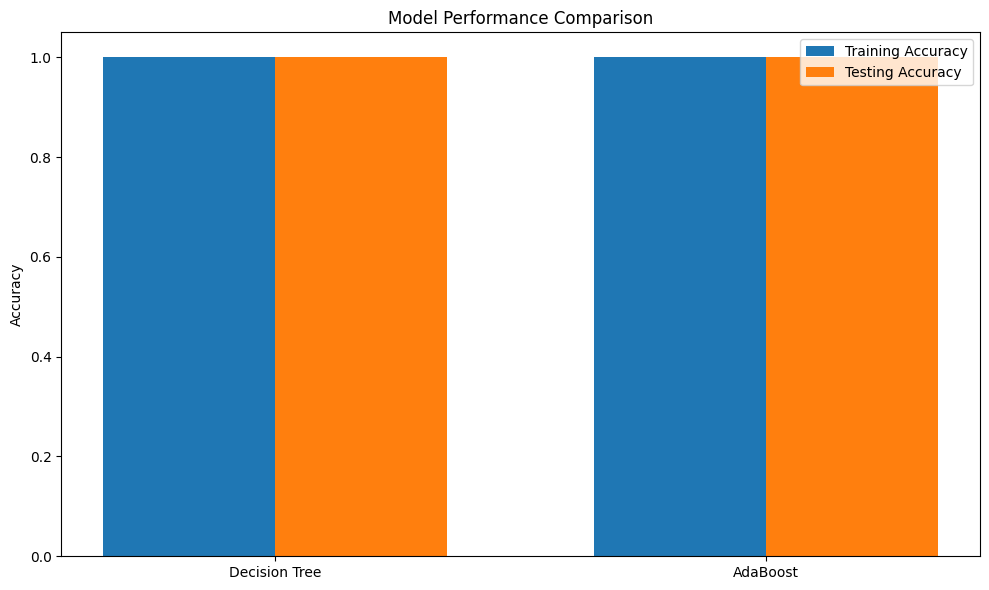

In [ ]:
# Visualisasi perbandingan akurasi
import matplotlib.pyplot as plt

algorithms = ['Decision Tree', 'AdaBoost']
train_scores = [accuracy_score(y_train, dt_train_pred), accuracy_score(y_train, ada_train_pred)]
test_scores = [accuracy_score(y_test, dt_test_pred), accuracy_score(y_test, ada_test_pred)]

x = np.arange(len(algorithms))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_scores, width, label='Training Accuracy')
rects2 = ax.bar(x + width/2, test_scores, width, label='Testing Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend()

plt.tight_layout()
plt.show()

# Tugas 3

Dengan menggunakan dataset diabetes, buatlah ensemble voting dengan algoritma

1. Logistic Regression

2. SVM kernel polynomial

3. Decission Tree

Anda boleh melakukan eksplorasi dengan melakukan tunning hyperparameter

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/ML/diabetes.csv')

# Pisahkan features dan target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 1. Tuning Logistic Regression
lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

lr = LogisticRegression(random_state=42, max_iter=1000)
lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid.fit(X_train_scaled, y_train)

print("Logistic Regression Best Parameters:", lr_grid.best_params_)
print("Logistic Regression Best Score:", lr_grid.best_score_)

# 2. Tuning SVM dengan kernel polynomial
svm_params = {
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],
    'coef0': [0.0, 1.0, 2.0]
}

svm = SVC(kernel='poly', probability=True, random_state=42)
svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train_scaled, y_train)

print("\nSVM Best Parameters:", svm_grid.best_params_)
print("SVM Best Score:", svm_grid.best_score_)

# 3. Tuning Decision Tree
dt_params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train_scaled, y_train)

print("\nDecision Tree Best Parameters:", dt_grid.best_params_)
print("Decision Tree Best Score:", dt_grid.best_score_)

Logistic Regression Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Logistic Regression Best Score: 0.7655204584832733

SVM Best Parameters: {'C': 0.1, 'coef0': 1.0, 'degree': 4}
SVM Best Score: 0.7687591630014661

Decision Tree Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Decision Tree Best Score: 0.759016393442623


In [ ]:
# Membuat Ensemble Voting dengan parameter terbaik
lr_best = LogisticRegression(**lr_grid.best_params_, random_state=42, max_iter=1000)
svm_best = SVC(kernel='poly', probability=True, random_state=42, **svm_grid.best_params_)
dt_best = DecisionTreeClassifier(**dt_grid.best_params_, random_state=42)

In [ ]:
# Membuat dan melatih voting classifier
estimators = [
    ('lr', lr_best),
    ('svm', svm_best),
    ('dt', dt_best)
]

# Mencoba kedua jenis voting: hard dan soft
voting_hard = VotingClassifier(estimators=estimators, voting='hard')
voting_soft = VotingClassifier(estimators=estimators, voting='soft')

# Melatih model voting
voting_hard.fit(X_train_scaled, y_train)
voting_soft.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1, max_iter=1000,
                                                 penalty='l1', random_state=42,
                                                 solver='saga')),
                             ('svm',
                              SVC(C=0.1, coef0=1.0, degree=4, kernel='poly',
                                  probability=True, random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=3,
                                                     min_samples_leaf=4,
                                                     random_state=42))],
                 voting='soft')


Performa Model Individual:

LR Performance:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154


SVM Performance:
              precision    recall  f1-score   support

           0       0.79      0.86      0.83        99
           1       0.70      0.60      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154


DT Performance:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73     

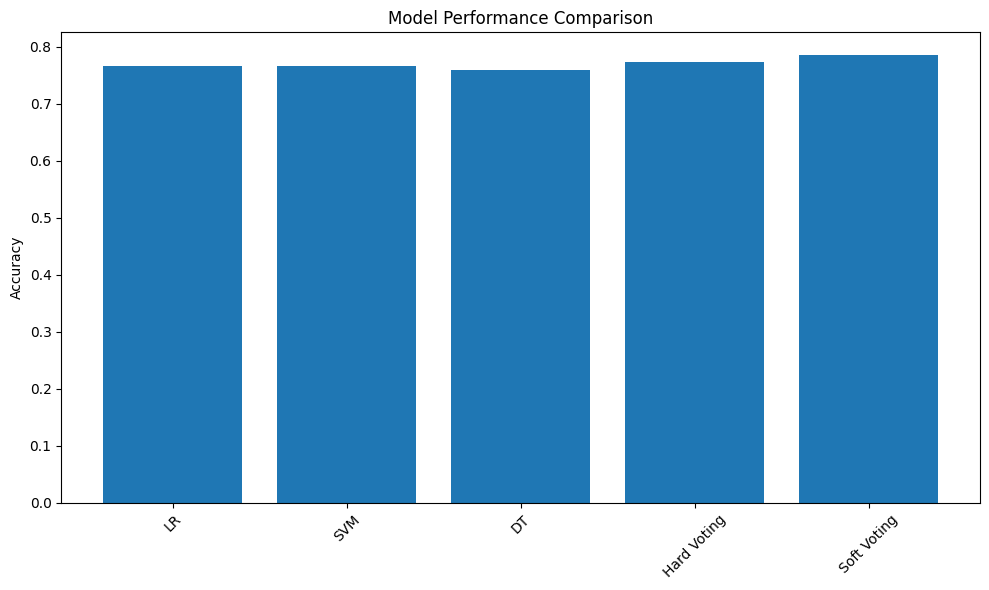

In [ ]:
# Evaluasi model individual
print("\nPerforma Model Individual:")
for name, model in estimators:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name.upper()} Performance:")
    print(classification_report(y_test, y_pred))

# Evaluasi model voting
print("\nPerforma Ensemble Voting:")
# Hard voting
y_pred_hard = voting_hard.predict(X_test_scaled)
print("\nHard Voting Performance:")
print(classification_report(y_test, y_pred_hard))

# Soft voting
y_pred_soft = voting_soft.predict(X_test_scaled)
print("\nSoft Voting Performance:")
print(classification_report(y_test, y_pred_soft))

# Visualisasi perbandingan akurasi
import matplotlib.pyplot as plt

# Menghitung akurasi untuk semua model
models = ['LR', 'SVM', 'DT', 'Hard Voting', 'Soft Voting']
accuracies = [
    accuracy_score(y_test, model.predict(X_test_scaled))
    for model in [lr_best, svm_best, dt_best, voting_hard, voting_soft]
]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()